#### Tesla Stock Price Financial Analysis

#### Data Analysis day 1 using pandas and matplotlib

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the data
tsl = pd.read_csv(r"C:\Users\jadha\Downloads\TSLA.csv")

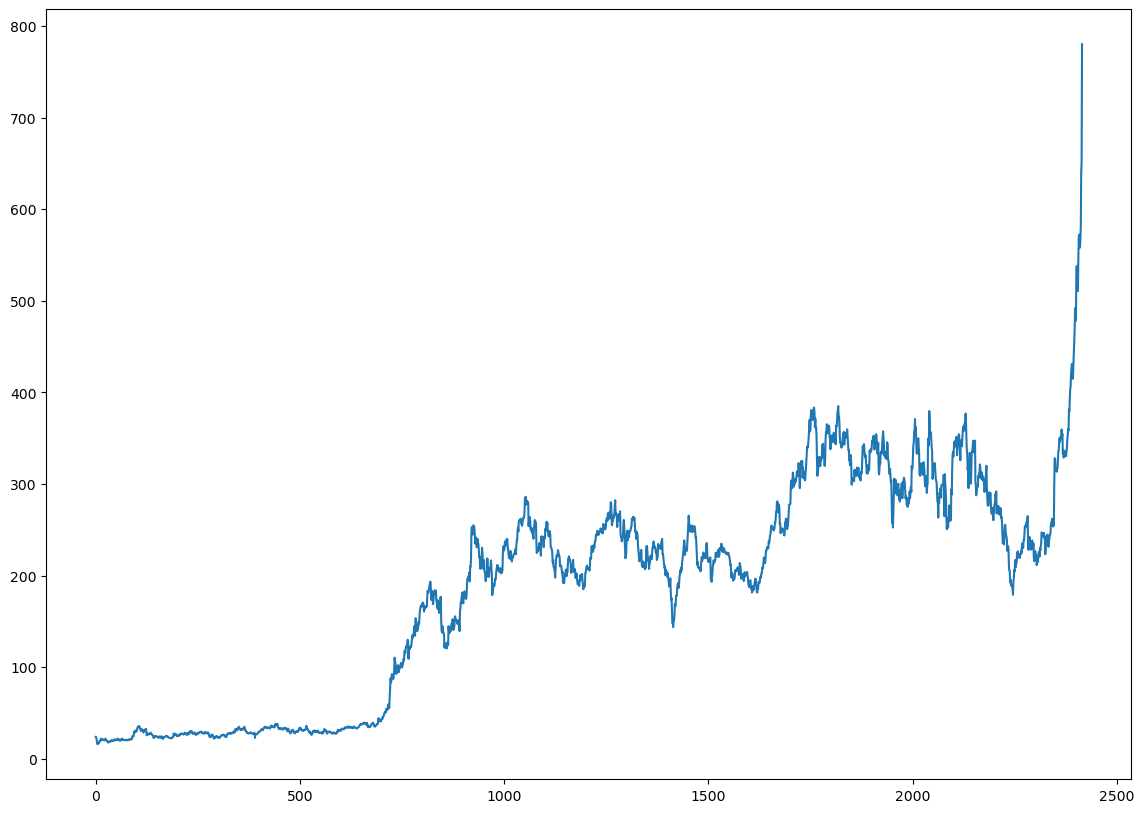

In [3]:
#plot stock data by line Graph
plt.figure(figsize=(14,10))
tsl['Close'].plot()
plt.show()

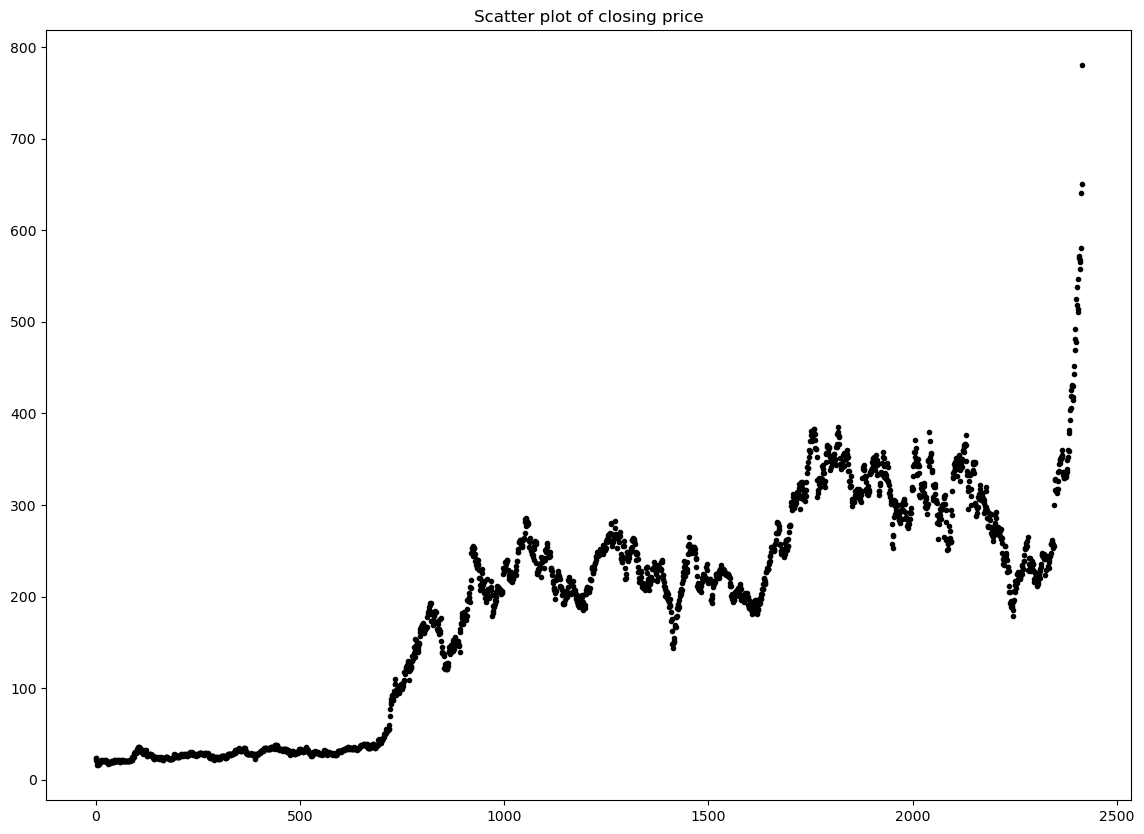

In [4]:
df_close = tsl['Close']
plt.figure(figsize=(14,10))
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

#### Create new colume of price differnce

In [5]:
tsl['price_diff']=tsl['Close'].shift(-1)-tsl['Close']
tsl['price_diff']

0        -0.059999
1        -1.870001
2        -2.759998
3        -3.090000
4        -0.310001
           ...    
2411     14.089966
2412     59.820008
2413      9.760009
2414    129.429993
2415           NaN
Name: price_diff, Length: 2416, dtype: float64

#### Create new colume for daily return

In [6]:
tsl['daily_rn']=tsl['price_diff']/tsl['Close']
tsl['daily_rn']

0      -0.002511
1      -0.078473
2      -0.125683
3      -0.160937
4      -0.019243
          ...   
2411    0.024854
2412    0.102962
2413    0.015231
2414    0.198949
2415         NaN
Name: daily_rn, Length: 2416, dtype: float64

###### Here we apply rolling widow calculation for 50 days. 
'''In statistics, a moving average (rolling average or running average) is a calculation to analyze data points by creating a series
 of averages of different subsets of the full data set. It is also called a moving mean (MM). or rolling mean and is a type of 
finite impulse response filter. Variations include: simple, cumulative, or weighted forms (described below). Highly used for financial analyses.'''

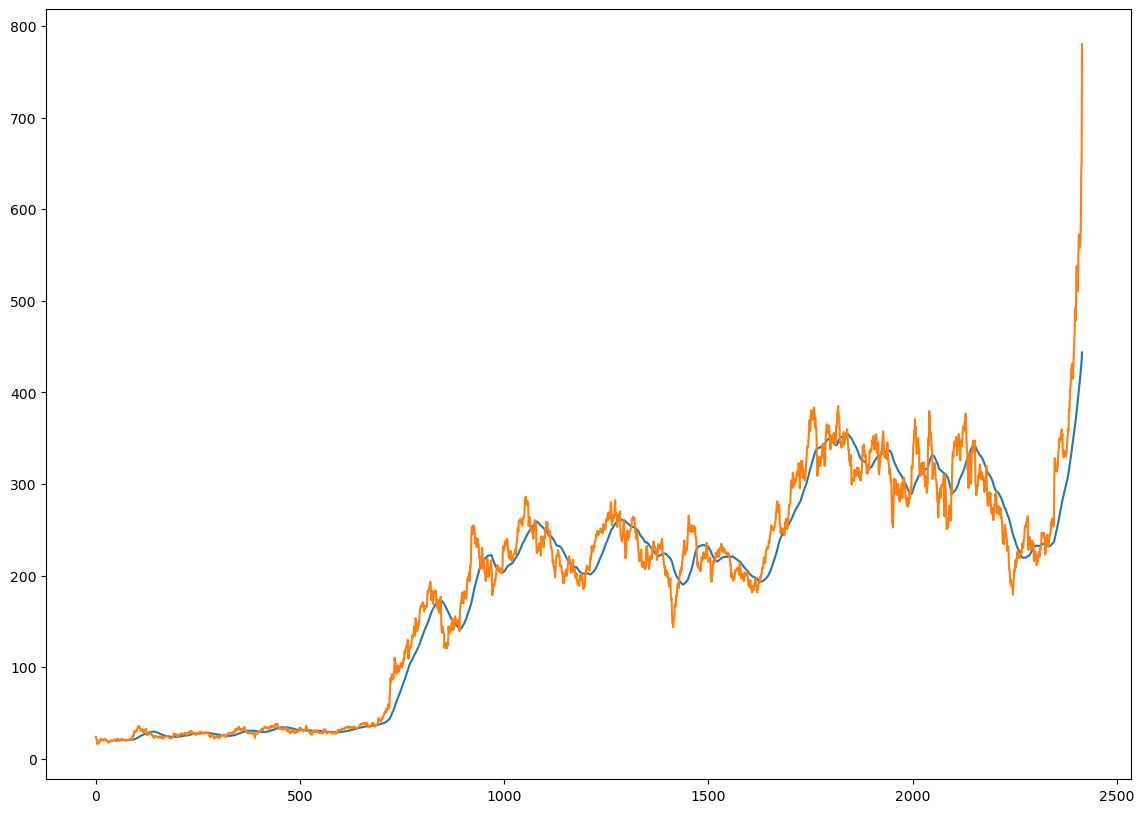

In [7]:
tsl['ra50']=tsl['Close'].rolling(50).mean()
plt.figure(figsize=(14,10))
tsl['ra50'].plot()
tsl['Close'].plot()
plt.show()


1) Here we have ten year chart of tesla stock with simple moveing average  the blue line is shorter 50 days moveing average most trader will use the cross of short term moving averagae.

2) To initial a moveing average to inital a long position and identify  the start of bullish trend.

In [8]:
tsl['ra50']=tsl['Close'].rolling(50).mean()
tsl['ra10']=tsl['Close'].rolling(10).mean()

In [9]:
tsl['ra50']


0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2411    418.773402
2412    423.406202
2413    429.179001
2414    435.190602
2415    443.600202
Name: ra50, Length: 2416, dtype: float64

In [10]:
tsl=tsl.dropna()


In [11]:
tsl['Shares']=[1 if tsl.loc[ei,'ra10']>tsl.loc[ei,'ra50']else 0 for ei in tsl.index]

In [12]:
# Calculate Profit

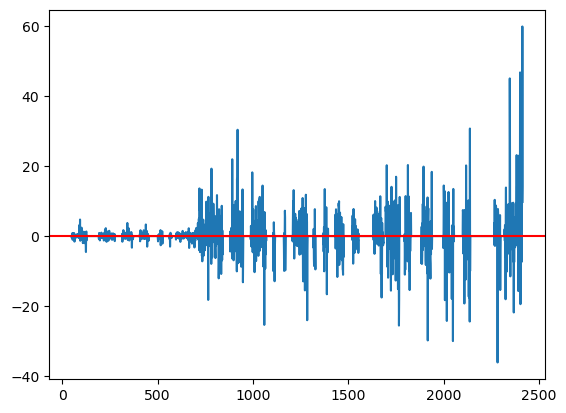

In [13]:
tsl['Close1']=tsl['Close'].shift(-1)
tsl['profit']=[tsl.loc[ei,'Close1']-tsl.loc[ei,'Close']if tsl.loc[ei,'Shares']==1 else 0 for ei in tsl.index]
tsl['profit'].plot()
plt.axhline(y=0,color='red')

In [14]:
tsl['log_return']=np.log(tsl['Close'].shift(-1))-np.log(tsl['Close'])
tsl['log_return']

49     -0.009133
50     -0.026420
51      0.026903
52      0.019121
53      0.039912
          ...   
2410    0.015788
2411    0.024551
2412    0.097999
2413    0.015116
2414         NaN
Name: log_return, Length: 2366, dtype: float64

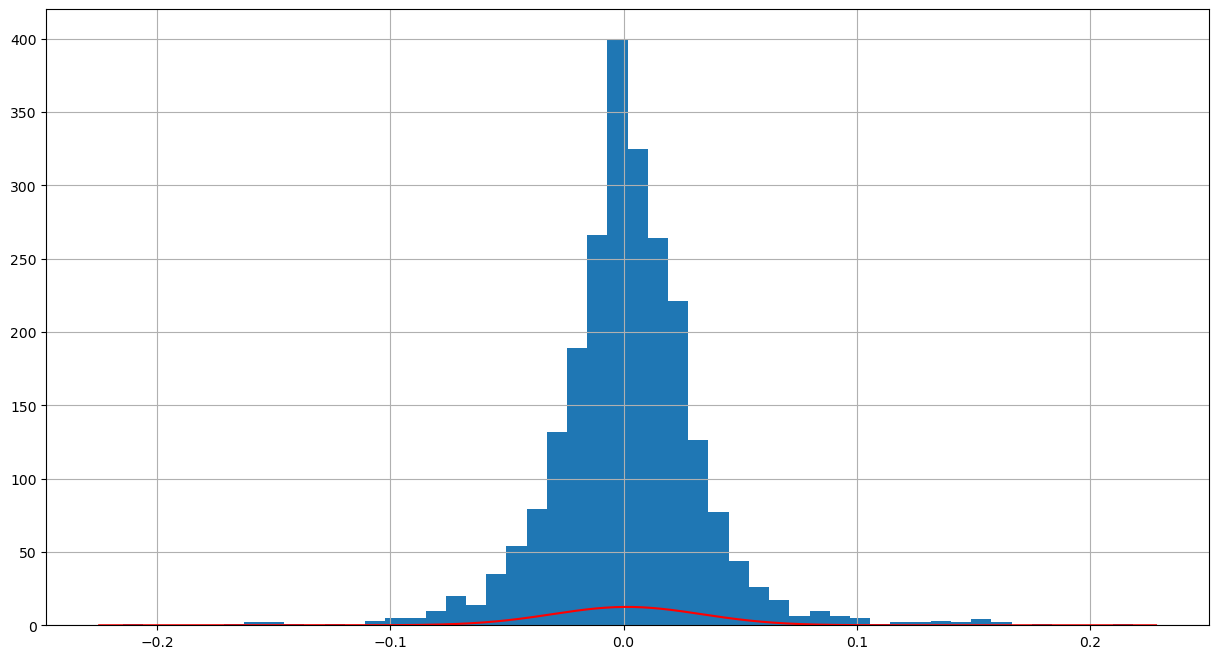

In [15]:
from scipy.stats import norm
mu = tsl['log_return'].mean()
sigma = tsl['log_return'].std(ddof=1)

density = pd.DataFrame()
density['x'] = np.arange(tsl['log_return'].min()-0.01, tsl['log_return'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

tsl['log_return'].hist(bins=50, figsize=(15, 8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

In [16]:
prob_return1 = norm.cdf(-0.10, mu, sigma)
print('The probability of dropping over 10% in one day ', prob_return1)

The probability of dropping over 10% in one day  0.0007272322154809123


In [17]:
mu220 = 365*mu
sigma220 = (365**0.5) * sigma
drop20 = None
print('The probability of dropping over 25% over a year: ', drop20)


The probability of dropping over 25% over a year:  None


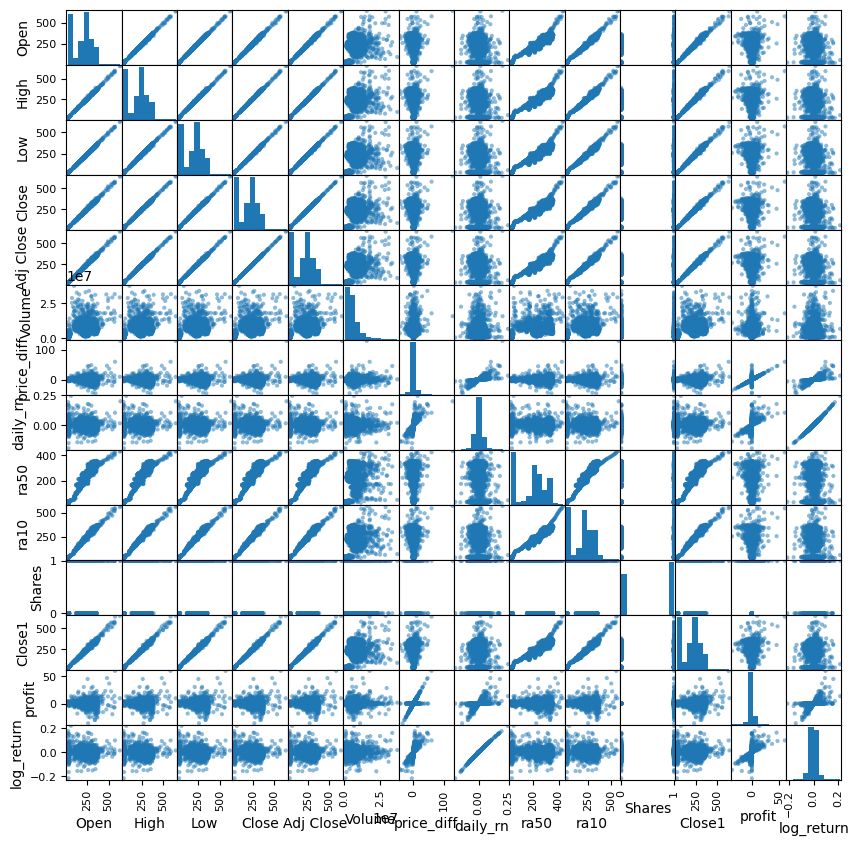

In [18]:
from pandas.plotting import scatter_matrix
sm = scatter_matrix(tsl, figsize=(10, 10))